In [1]:
'''
Created 05/01/2024 : Last Modified 25/07/2024

Written by Richard Cannon
'''

# Produces a chisquared colormap for the pole position of a target.
# Takes data for lambda, beta, and their chisquared from input files
# and interpolates the data onto a grid of pole solutions. 
# Plots a chi plane and also the two polar views of the plane


'\nCreated 05/01/2024 : Last Modified 25/07/2024\n\nWritten by Richard Cannon\n'

In [2]:
import sys
sys.path.append('/home/rcannon/Code/Radar/python_scripts')

In [3]:
from pyshape import polescan,plot_quick,mod_file
import numpy as np
import cmasher as cmr

In [4]:

target = '2000rs11'
data_path = f'/home/rcannon/Code/Radar/{target}/PS_sh_5/SH01'
# data_path = f'/home/rcannon/Code/Radar/{target}/PS_sh_10/SH02-LR/sh02-LR'


# target = '2024on'
# data_path = f'/home/rcannon/Code/Radar/{target}/init_ps'


# data_path = '/home/rcannon/Code/Radar/388188/shape/pnr_PS/pnr_ps_4-1'
# target = '388188'


In [5]:
bet,lam,chi = polescan.results(data_path)

bet,lam = bet[~np.isnan(chi)],lam[~np.isnan(chi)]
chi = chi[~np.isnan(chi)]

Found 571 log files


1.573411


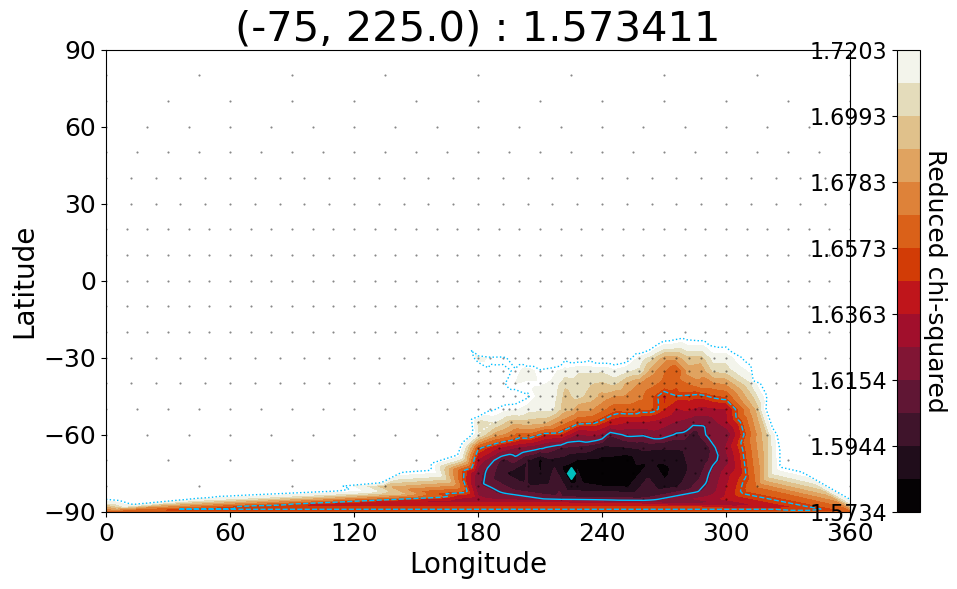

1

In [6]:
#Plot
plot_quick.pq_polescan(bet,lam,chi,
                    maxlevel=1.1,lamstep=1,betstep=1,
                    lines=[2.5,5,10],cmp='cmr.sunburst')

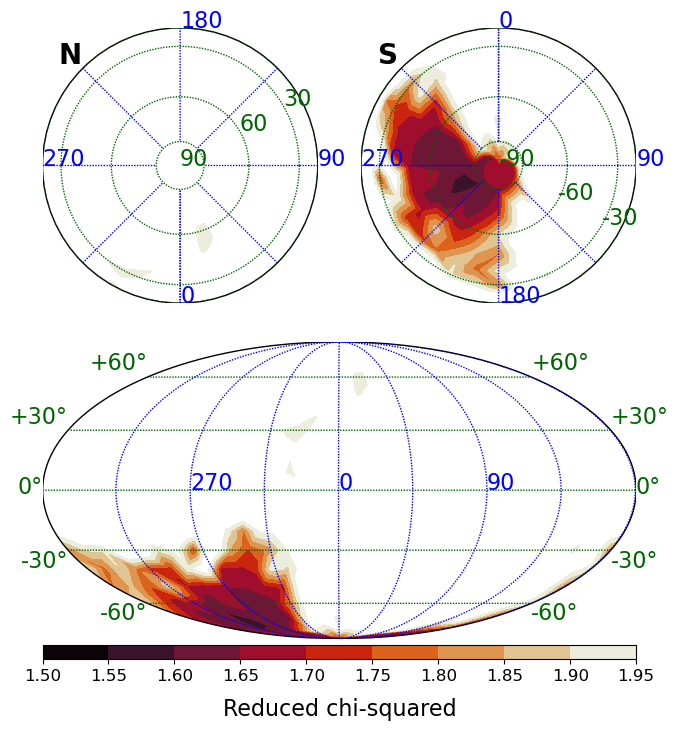

In [7]:
import numpy as np
from pyshape import plot_pub

plot_pub.pp_polescan(bet,lam,chi,target,cmp_array=list(np.arange(1.5,2.0,0.05)),
                     save=False,cmp='cmr.sunburst')

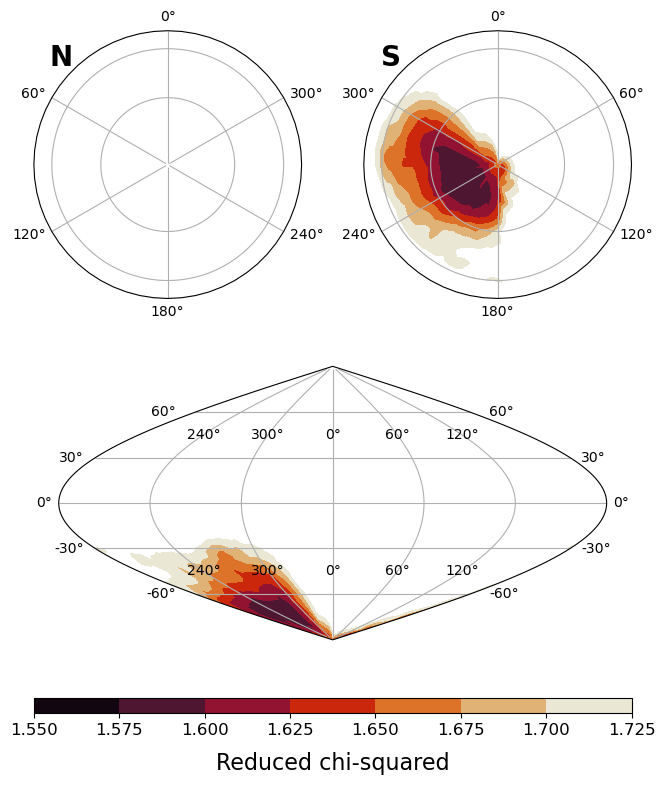

In [14]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np

minchi = np.min(chi)
betall,lamall,chiall = polescan.interpolate_chi(bet,lam,chi,betstep=1,lamstep=1)

proj = ['N','S']
ortho_N = ccrs.Orthographic(central_longitude=180,central_latitude=+90)
ortho_S = ccrs.Orthographic(central_longitude=0,central_latitude=-90)
moll    = ccrs.Mollweide(central_longitude=180)
sin     = ccrs.Sinusoidal()
pltcrr  = ccrs.PlateCarree()

cmp_array = np.arange(1.55,1.725,0.025)

# fig = plt.figure(figsize=[3.37689*2,3.37689*9/8*2])
fig = plt.figure(figsize=[3.37689*2,3.7689*9/8*2])
ax1 = plt.subplot2grid(shape=(2, 2), loc=(0, 0), colspan=1, projection=ortho_N)
ax2 = plt.subplot2grid(shape=(2, 2), loc=(0, 1), colspan=1, projection=ortho_S)
ax3 = plt.subplot2grid(shape=(2, 2), loc=(1, 0), colspan=2, projection=sin)


for i,ax in enumerate([ax1,ax2,ax3]):
    ax.set_global()
    
    #Plot colour map
    cs = ax.contourf(lamall, betall, chiall, 
                     cmap='cmr.sunburst', levels=cmp_array,
                     transform=pltcrr)

    gl = ax.gridlines(draw_labels=True, linestyle='-')
    
    gl.xlocator = mticker.FixedLocator([-120,-60,0,60,120,179.999])
    gl.ylocator = mticker.FixedLocator([-90,-60,-30,0,30,60,90])

    gl.xformatter = mticker.FuncFormatter(lambda x, pos: f"{x % 360:.0f}°")
    gl.yformatter = mticker.FuncFormatter(lambda x, pos: f"{x:.0f}°")



    #N/S labels
    if i!=2:
        ax.text(0.1, 0.9, proj[i], transform=ax.transAxes, fontsize=20, fontweight='bold', ha='center', va='center')


    #Customise which appear
    # import matplotlib.ticker as mticker
    # gl.xlocator = mticker.FixedLocator([0, 90, 180, 270])
    # gl.ylocator = mticker.FixedLocator([-60, -30, 0, 30, 60])

cbar = plt.colorbar(cs,ax=ax3, aspect=40, location='bottom')
cbar.ax.tick_params(labelsize=12)
cbar.set_label('Reduced chi-squared', rotation=0, fontsize=16, labelpad=10)

fig.tight_layout()



In [12]:
chi_thresh = np.min(chi)*1.025
print(f'{chi_thresh=}')
print("")
count = 0
cores = []
for lat, lon, chi_val in zip(bet,lam,chi):
    if chi_val < chi_thresh:
        namecore = f'lat{int(lat):+3d}lon{int(lon):3d}.mod'
        print(namecore)
        count +=1

        cores.append(namecore)
print(count)

chi_thresh=np.float64(1.6127462749999997)

lat-60lon244.mod
lat-60lon276.mod
lat-60lon284.mod
lat-65lon220.mod
lat-65lon230.mod
lat-65lon240.mod
lat-65lon250.mod
lat-65lon260.mod
lat-65lon270.mod
lat-65lon280.mod
lat-65lon290.mod
lat-70lon192.mod
lat-70lon204.mod
lat-70lon216.mod
lat-70lon228.mod
lat-70lon240.mod
lat-70lon252.mod
lat-70lon264.mod
lat-70lon276.mod
lat-70lon288.mod
lat-75lon195.mod
lat-75lon210.mod
lat-75lon225.mod
lat-75lon240.mod
lat-75lon255.mod
lat-75lon270.mod
lat-75lon285.mod
lat-80lon204.mod
lat-80lon228.mod
lat-80lon252.mod
lat-80lon276.mod
lat-85lon220.mod
lat-85lon260.mod
33


In [ ]:
import os
import shutil

# new_dir = f'/home/rcannon/Code/Radar/{target}/v01/v500'

chi_thresh = np.min(chi)*1.025
print(f'{chi_thresh=}')
print("")
f = open(f'{new_dir}/namecores.txt','w')
for lat, lon, chi_val in zip(bet, lam, chi):
    if chi_val < chi_thresh:
        lat, lon = int(lat), int(lon)
        namecore = f'lat{lat:+3d}lon{lon:03d}'
        print(f'{namecore=}')

        src = f'{data_path}/modfiles/{namecore}.mod'
        dst = f'{new_dir}/modfiles/{namecore}.mod'
        print(f'Copying {src} -> {dst}')
        shutil.copy(src, dst)

        src = f'{data_path}/obsfiles/{namecore}.obs'
        dst = f'{new_dir}/obsfiles/{namecore}.obs'
        print(f'Copying {src} -> {dst}')
        shutil.copy(src, dst)

        f.write(f'{namecore}\n')

f.close()




chi_thresh=np.float64(1.6127462749999997)

namecore='lat-60lon244'
Copying /home/rcannon/Code/Radar/2000rs11/PS_sh_5/SH01-HR/modfiles/lat-60lon244.mod -> /home/rcannon/Code/Radar/2000rs11/v01/v500/modfiles/lat-60lon244.mod
Copying /home/rcannon/Code/Radar/2000rs11/PS_sh_5/SH01-HR/obsfiles/lat-60lon244.obs -> /home/rcannon/Code/Radar/2000rs11/v01/v500/obsfiles/lat-60lon244.obs
namecore='lat-60lon276'
Copying /home/rcannon/Code/Radar/2000rs11/PS_sh_5/SH01-HR/modfiles/lat-60lon276.mod -> /home/rcannon/Code/Radar/2000rs11/v01/v500/modfiles/lat-60lon276.mod
Copying /home/rcannon/Code/Radar/2000rs11/PS_sh_5/SH01-HR/obsfiles/lat-60lon276.obs -> /home/rcannon/Code/Radar/2000rs11/v01/v500/obsfiles/lat-60lon276.obs
namecore='lat-60lon284'
Copying /home/rcannon/Code/Radar/2000rs11/PS_sh_5/SH01-HR/modfiles/lat-60lon284.mod -> /home/rcannon/Code/Radar/2000rs11/v01/v500/modfiles/lat-60lon284.mod
Copying /home/rcannon/Code/Radar/2000rs11/PS_sh_5/SH01-HR/obsfiles/lat-60lon284.obs -> /home/rcannon/Code

namecore='lat-65lon270'
Copying /home/rcannon/Code/Radar/2000rs11/PS_sh_5/SH01-HR/modfiles/lat-65lon270.mod -> /home/rcannon/Code/Radar/2000rs11/v01/v500/modfiles/lat-65lon270.mod
Copying /home/rcannon/Code/Radar/2000rs11/PS_sh_5/SH01-HR/obsfiles/lat-65lon270.obs -> /home/rcannon/Code/Radar/2000rs11/v01/v500/obsfiles/lat-65lon270.obs
namecore='lat-65lon280'
Copying /home/rcannon/Code/Radar/2000rs11/PS_sh_5/SH01-HR/modfiles/lat-65lon280.mod -> /home/rcannon/Code/Radar/2000rs11/v01/v500/modfiles/lat-65lon280.mod
Copying /home/rcannon/Code/Radar/2000rs11/PS_sh_5/SH01-HR/obsfiles/lat-65lon280.obs -> /home/rcannon/Code/Radar/2000rs11/v01/v500/obsfiles/lat-65lon280.obs
namecore='lat-65lon290'
Copying /home/rcannon/Code/Radar/2000rs11/PS_sh_5/SH01-HR/modfiles/lat-65lon290.mod -> /home/rcannon/Code/Radar/2000rs11/v01/v500/modfiles/lat-65lon290.mod
Copying /home/rcannon/Code/Radar/2000rs11/PS_sh_5/SH01-HR/obsfiles/lat-65lon290.obs -> /home/rcannon/Code/Radar/2000rs11/v01/v500/obsfiles/lat-65lon

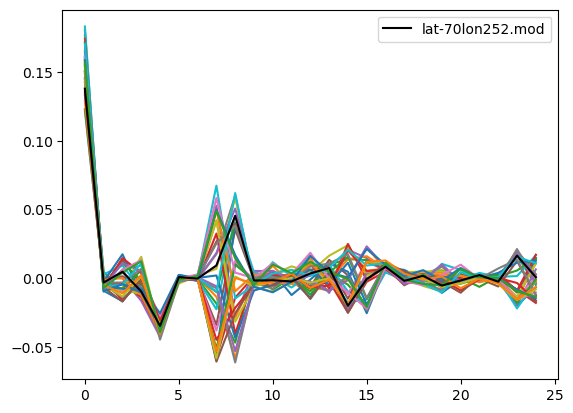

In [41]:

dpath = '/home/rcannon/Code/Radar/2000rs11/PS_sh_5/SH01-HR/modfiles/'

coeff_list = []

for mod in cores:

    mod_info = mod_file.read(f'{dpath}/{mod}')
    
    coeffs = mod_info.components[0].coeffs

    coeff_list.append(coeffs)

coeff_array = np.array(coeff_list)

for c,nam in zip(coeff_array,cores):

    plt.plot(c)#,label=nam)

i = 16
plt.plot(coeff_array[i],'k-',label=cores[i])


plt.legend()